In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

Reading CSV file using panda

In [72]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
DF = pd.read_csv('/kaggle/input/titanic/test.csv')

**SOME EXPOLATORY DATA ANALYSIS**

In [99]:
DF.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",22.0,0,0,330911,7.8292,38,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",38.0,1,0,363272,7.0000,38,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",26.0,0,0,240276,9.6875,38,1,1,0
3,895,3,"Wirz, Mr. Albert",35.0,0,0,315154,8.6625,38,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",35.0,1,1,3101298,12.2875,38,0,0,1


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:

DF.iloc[DF[(DF.isnull().sum(axis=1) >=2)].index]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,55.5,0,0,3701,NaN,NaN,S


In [94]:
DF = DF.replace(to_replace = np.nan, value = 38)

**CHECKING OF NULL VALUES USING HEATMULL AND .ISNULL()**

In [91]:
DF.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,28.276914,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.884702,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200


<Axes: >

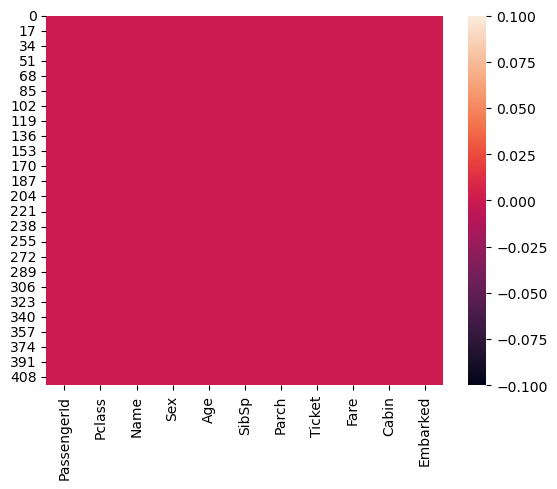

In [96]:
sns.heatmap(DF.isnull())

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


IMPUTING THE NULL VALUES BY FILLING THE VALUES USING A FUNCCTION

In [48]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)
DF['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)


In [ ]:
sns.heatmap(DF.isnull())

In [ ]:
CHANGING CATEROGIAL VALUES INTO NUMERIC BY USING DUMMY VARIABLES

In [51]:
feature = ['Sex','Embarked']
dataframe = pd.get_dummies( df, columns = feature,drop_first=True )

In [98]:
feature = ['Sex','Embarked']
DF = pd.get_dummies( DF, columns = feature,drop_first=True )

*CHECKING OF NULL VALUES USING HEAT MAP AND .ISNULL()**

<Axes: >

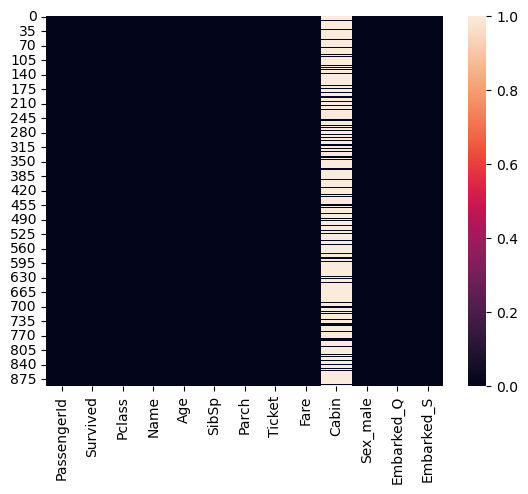

In [52]:
sns.heatmap(dataframe.isnull())

In [53]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [54]:
dataframe.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.007763
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,-0.033606,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,0.022148,-0.155660,0.081720,0.007763,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


In [70]:
X = dataframe[[ 'Pclass', 'Sex_male', 'SibSp',
       'Parch','Embarked_S','Fare','Age' ]]
Y = dataframe['Survived']



X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 30)






 **FOR TEST DATA**

In [100]:
x = DF[[ 'Pclass', 'Sex_male', 'SibSp',
       'Parch','Embarked_S','Fare','Age' ]]



**IMPORTING LOGISTIC REGRESSION AND PREDICTING AND CHECKING ACCURACY**

In [101]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

predictions = lr.predict(x)


In [1]:
print(classification_report(predict,Y_test))

NameError: name 'classification_report' is not defined

In [103]:
output = pd.DataFrame({'PassengerId': DF.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
